# Identification of pulsar candidate signals

In this exercise we use the k-Nearest Neighbors algorithm to predict a pulsar star from a series of measurements collected by the HTRU survey. The dataset is available at:

https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star/version/1

This dataset contains the values of 8 features and the class the astronomical object belongs to: 0 (not a pulsar) and 1 (pulsar). Here we use the scikit learn library and find empirically the number of nearest neighbors which optimizes the accuray of the classifier on the test set.

Enjoy!


We load the modules we use

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier

from IPython.display import display

Data cleansing. We load the dataset and rename the columns. We make sure there is no missing information

In [2]:
catalog = pd.read_csv('pulsar_stars.csv')
cnames = ['Imean','Isigma','Ikurtosis','Iskewness','DMmean','DMsigma','DMkurtosis','DMskewnes','target']
catalog.columns=cnames
display(catalog)
print("Is there any NaN?: {}".format(catalog.isnull().any().any()))

Imean     Isigma  Ikurtosis  Iskewness      DMmean    DMsigma  \
0      140.562500  55.683782  -0.234571  -0.699648    3.199833  19.110426   
1      102.507812  58.882430   0.465318  -0.515088    1.677258  14.860146   
2      103.015625  39.341649   0.323328   1.051164    3.121237  21.744669   
3      136.750000  57.178449  -0.068415  -0.636238    3.642977  20.959280   
4       88.726562  40.672225   0.600866   1.123492    1.178930  11.468720   
5       93.570312  46.698114   0.531905   0.416721    1.636288  14.545074   
6      119.484375  48.765059   0.031460  -0.112168    0.999164   9.279612   
7      130.382812  39.844056  -0.158323   0.389540    1.220736  14.378941   
8      107.250000  52.627078   0.452688   0.170347    2.331940  14.486853   
9      107.257812  39.496488   0.465882   1.162877    4.079431  24.980418   
10     142.078125  45.288073  -0.320328   0.283953    5.376254  29.009897   
11     133.257812  44.058244  -0.081060   0.115362    1.632107  12.007806   
12     134.960938  49.554327  -0.135304  -0.080470   10.696488  41.342044   
13     117.945312  45.506577   0.325438   0.661459    2.836120  23.118350   
14     138.179688  51.524484  -0.031852   0.046797    6.330268  31.576347   
15     114.367188  51.945716  -0.094499  -0.287984    2.738294  17.191891   
16     109.640625  49.017652   0.137636  -0.256700    1.508361  12.072901   
17     100.851562  51.743522   0.393837  -0.011241    2.841137  21.635778   
18     136.093750  51.691005  -0.045909  -0.271816    9.342809  38.096400   
19      99.367188  41.572202   1.547197   4.154106   27.555184  61.719016   
20     100.890625  51.890394   0.627487  -0.026498    3.883779  23.045267   
21     105.445312  41.139969   0.142654   0.320420    3.551839  20.755017   
22      95.867188  42.059922   0.326387   0.803502    1.832776  12.248969   
23     117.367188  53.908614   0.257953  -0.405049    6.018395  24.766123   
24     106.648438  56.367182   0.378355  -0.266372    2.436455  18.405371   
25     112.718750  50.301270   0.279391  -0.129011    8.281773  37.810012   
26     130.851562  52.432857   0.142597   0.018885    2.646321  15.654436   
27     119.437500  52.874815  -0.002549  -0.460360    2.365385  16.498032   
28     123.210938  51.078012   0.179377  -0.177285    2.107023  16.921773   
29     102.617188  49.692354   0.230439   0.193325    1.489130  16.004411   
...           ...        ...        ...        ...         ...        ...   
17868   96.859375  49.822769   0.276811  -0.331824    1.744147  14.764022   
17869  137.375000  50.762775   0.085075  -0.092679    7.561037  33.471080   
17870  110.765625  55.342186   0.066100  -0.500415   14.379599  45.320742   
17871  119.007812  52.091041   0.215294  -0.020229    2.012542  18.754594   
17872  139.898438  44.281034  -0.044618   0.100841    1.139632  11.196096   
17873   89.453125  35.848827   0.731656   3.101474    1.450669  14.204964   
17874  126.554688  54.275888   0.207825  -0.191686    2.294314  17.429850   
17875  133.140625  43.706181  -0.012686   0.232394    2.091973  13.489370   
17876  111.765625  52.943585   0.671724   0.383594  149.843646  97.926948   
17877  118.296875  49.932824   0.144401  -0.269273    1.041806  10.199265   
17878   90.148438  40.786044   0.457139   0.885516    5.354515  29.759511   
17879  107.664062  44.462463   0.296046   0.227765    6.290970  33.512873   
17880  105.492188  43.500718   0.154180   0.408117    2.316054  19.098507   
17881  130.500000  46.149553   0.084445  -0.107355    1.529264  11.757086   
17882  131.000000  55.935789  -0.023598  -0.536651    1.159699  10.856794   
17883   84.421875  41.775555   0.757467   1.107075    1.336120  12.026757   
17884  106.875000  47.571328   0.199440   0.284964    3.079431  20.984455   
17885  133.820312  43.478161   0.136691   0.353121    0.982441   9.486068   
17886  127.070312  47.663564   0.006552  -0.123634    0.853679  11.197206   
17887  121.375000  53.245158   0.103772  -0.365119    1.095318  12.239976   
17888   

Is there any NaN?: False


We create the scikit-learn bunch object

In [3]:
#We take the values of the dataframe object 'catalog' and use them to initialize the scikit-learn bunch object. Note
#that we have dropped the 'target' column. Both catalog_data & catalog_target are numpy arrays
catalog_data=catalog.drop('target',axis=1).values
catalog_target=catalog.target.values

dataset = sklearn.datasets.base.Bunch(data=catalog_data,target=catalog_target)
print ("Type of the dataset: {}".format(type(dataset)))
print ("Type of the data: {}".format(type(dataset.data)))
print ("Type of the target: {}".format(type(dataset.target)))

Type of the dataset: <class 'sklearn.utils.Bunch'>
Type of the data: <class 'numpy.ndarray'>
Type of the target: <class 'numpy.ndarray'>


Exploratory analysis. We split the dataset into the training and the test sets. Then we make a matrix plot to have a first look at the data

X_train shape: (13423, 8)
y_train shape: (13423,)
X_test shape: (4475, 8)
y_test shape: (4475,)


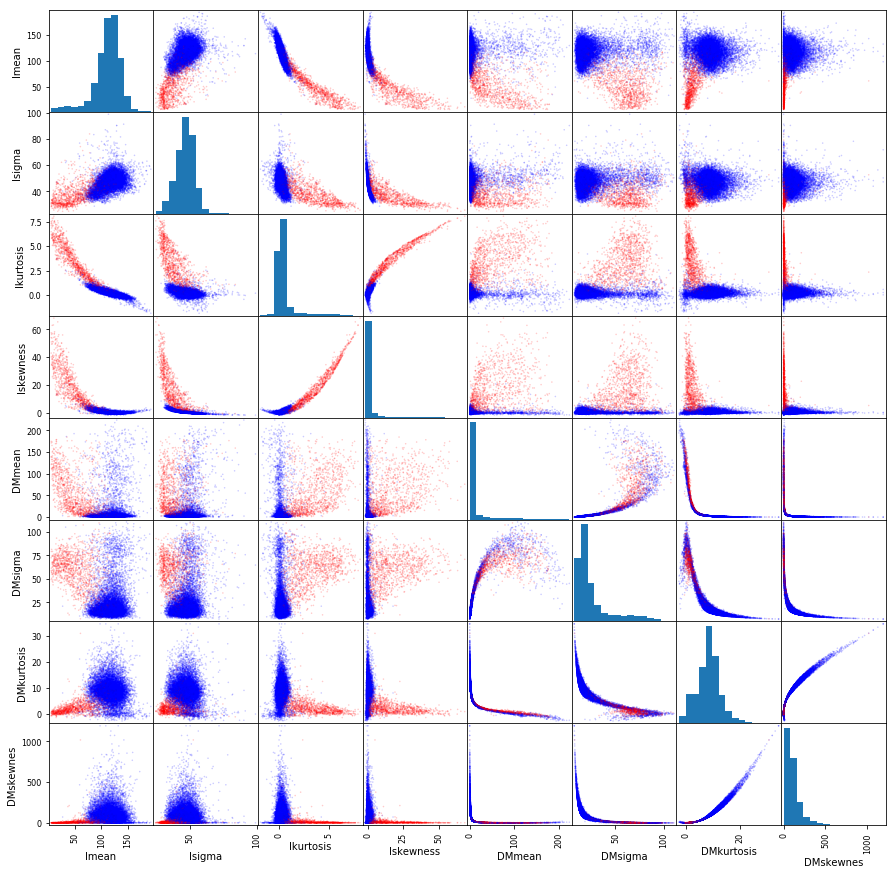

In [4]:
#test_size = 0.25 by default
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25,random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

#When creating the dataframe of the train set we drop the 'target' column
train_dataframe = pd.DataFrame(X_train, columns=catalog.columns.drop('target'))
pd.plotting.scatter_matrix(train_dataframe, c=y_train, figsize=(15, 15), marker='.',
                           hist_kwds={'bins': 15}, s=10, alpha=.2,cmap=plt.get_cmap('bwr'))
#plt.savefig('test.eps')

In [5]:
pc = KNeighborsClassifier(n_neighbors=3)
pc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [6]:
#We first train the classifier and then assess its perfomance on the test dataset
pc.fit(X_train,y_train)
pc.score(X_test,y_test)

0.97407821229050284

This is to figure out what is the optimal value of the number of neighbors taken into account in order to achive the best performance on the test dataset

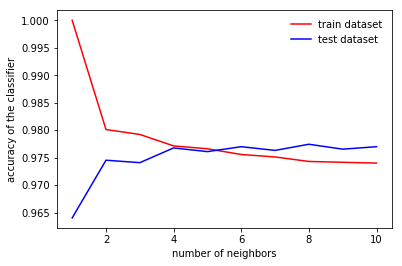

In [7]:
kneigh=list(range(1,11))
score_train = []
score_test  = []

for i in kneigh:
    pc = KNeighborsClassifier(n_neighbors=i)
    pc.fit(X_train, y_train)
    score_train.append(pc.score(X_train,y_train))
    score_test.append(pc.score(X_test,y_test))

#number of neighbors vs accuracy of the classifier plot    
plt.plot(kneigh,score_train,'r',label='train dataset')
plt.plot(kneigh,score_test,'b',label='test dataset')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy of the classifier')
plt.legend(frameon=False)